<div style="text-align: center;">
    <h1> <font style="bold"> Analisis Predictivo Avanzado </font></h1>
    <h2><font style="bold">Trabajo práctico 2</font></h2>
    <h3><font style="bold">Integrantes:</font></h3>
</div>
<div style="display: flex; justify-content: center;">
    <h4><ul>
        <li>Noguera Abril</li>
        <li>Arbues Lucas</li>
        <li>Alfie Agustin</li>
        </ul>
    </h4>
</div>

Las plataformas de streaming ofrecen una gran cantidad de películas, lo que a menudo resulta en una elección difícil para los usuarios. Esta "Parálisis por Análisis" puede afectar negativamente la experiencia del usuario, disminuyendo el compromiso con la plataforma y aumentando las tasas de cancelación de suscripciones.

# Justificacion de Negocio

El sistema de recomendación de películas está diseñado para **mejorar la experiencia del usuario** mediante la facilitación de la elección de contenidos. El desafío radica en desarrollar un mecanismo que no solo se alinee con las preferencias individuales de los usuarios sino que también fomente el descubrimiento de nuevas películas que puedan ser de su interés, con el fin de aumentar su satisfacción y fidelidad a la plataforma.

<p align="center">
  <img src="imagenes/movierecommendation.png" alt="Movie Recommendation System" width="400"/>
</p>

Este Notebook se enfocará en el desarrollo de un sistema de recomendación de películas mediante el uso de técnicas avanzadas de machine learning. Se utilizarán algoritmos de filtrado colaborativo, metodos basados en memoria y metodos colaborativos para analizar los patrones de visualización, las calificaciones y los metadatos de las películas, con el objetivo de proporcionar recomendaciones precisas y personalizadas.

Se incluirá en el proyecto una fase de despliegue (deploy) que permitirá a los usuarios interactuar con el sistema de recomendación en un entorno operativo. Mediante una interfaz sencilla, los usuarios podrán ingresar su ID y el título de una película que les haya gustado para recibir recomendaciones personalizadas. Este enfoque asegura la transición del modelo desde el desarrollo hasta su aplicación práctica, donde su efectividad puede ser evaluada en términos de mejora en la experiencia del usuario.

Este Notebook documentará el proceso completo, desde la preparación de los datos hasta el despliegue operativo del sistema, sirviendo como una guía detallada para la implementación del sistema de recomendación y la evaluación de su rendimiento en un escenario real.

# Preparacion de la Informacion

## Imports

In [786]:
import pandas as pd
import numpy as np
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import ast
from ast import literal_eval
import geopandas as gpd


## Carga de Bases de Datos

In [787]:
movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_42585/3221149849.py:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')


## Exploracion de Datos

In [788]:
movies.columns

Index(['title', 'overview', 'release_date', 'vote_average', 'vote_count',
       'genres', 'id', 'original_language', 'popularity', 'adult', 'budget',
       'revenue', 'runtime', 'status', 'tagline', 'video',
       'belongs_to_collection', 'homepage', 'imdb_id', 'original_title',
       'poster_path', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

### Columnas

* **adult:** Indica si la pelicula es X-Rated o Adult.
* **belongs_to_collection:** Un diccionario que da informacion de la saga a la que la pelicula pertenece.
* **budget:** Presupuesto de la pelicula en dolares. 
* **genres:** Una lista en forma de texto de diccionarios que enumeran todos los géneros asociados con la película.
* **homepage:** La página oficial de la película.
* **id:** El ID de la película.
* **imdb_id:** El ID de IMDB de la película.
* **original_language:** El idioma en el que la película fue originalmente filmada.
* **original_title:** El título original de la película.
* **overview:** Una breve descripción de la película.
* **popularity:** La puntuación de popularidad asignada por TMDB.
* **poster_path:** La URL de la imagen del póster.
* **production_companies:** Una lista en forma de texto de las compañías de producción involucradas en la realización de la película.
* **production_countries:** Una lista en forma de texto de los países donde la película fue rodada/producida.
* **release_date:** Fecha de lanzamiento teatral de la película.
* **revenue:** Los ingresos totales de la película en dólares.
* **runtime:** La duración de la película en minutos.
* **spoken_languages:** Una lista en forma de texto de los idiomas hablados en la película.
* **status:** El estado de la película (Estrenada, Por estrenar, Anunciada, etc.)
* **tagline:** El lema publicitario de la película.
* **title:** El título oficial de la película.
* **video:** Indica si hay un video presente de la película en TMDB.
* **vote_average:** La calificación promedio de la película.
* **vote_count:** El número de votos de usuarios, según lo contado por TMDB.

In [789]:
movies.shape

(55332, 24)

In [790]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55332 entries, 0 to 55331
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  55326 non-null  object 
 1   overview               54341 non-null  object 
 2   release_date           55230 non-null  object 
 3   vote_average           55325 non-null  float64
 4   vote_count             55325 non-null  object 
 5   genres                 55331 non-null  object 
 6   id                     55331 non-null  object 
 7   original_language      55320 non-null  object 
 8   popularity             55326 non-null  object 
 9   adult                  55331 non-null  object 
 10  budget                 55331 non-null  object 
 11  revenue                55325 non-null  float64
 12  runtime                55068 non-null  object 
 13  status                 55243 non-null  object 
 14  tagline                27979 non-null  object 
 15  vi

In [791]:
movies.head(2)

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,adult,...,tagline,video,belongs_to_collection,homepage,imdb_id,original_title,poster_path,production_companies,production_countries,spoken_languages
0,Expend4bles,Armed with every weapon they can get their han...,15/09/2023,6,764,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",299054,en,1294.274,FALSE,...,They'll die when they're dead.,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",25/10/2023,8,2365,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",507089,en,1859.189,FALSE,...,Can you survive five nights?,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La informacion actualizada no trae las siguientes columnas:
belongs_to_collection,	homepage,	imdb_id	original_title,	poster_path	production_companies,	production_countries y	spoken_languages

### Data Wrangling

El ID de IMDB no es representativo por lo que sera eliminado, el que es utilizado para vincular la informacion de las peliculas con los links, ratings y keywords es ID.

In [792]:
movies = movies.drop(['imdb_id'], axis=1)

La columna original_title representa el titulo de la pelicula en el idioma original. Para mantener la consistencia se mantiene unicamente la variable traducida **title**.

In [793]:
movies[movies['original_title'] != movies['title']][['title', 'original_title']].tail()

,title,original_title
55319,Mom,Maa
55321,St. Michael Had a Rooster,San Michele aveva un gallo
55327,Subdue,رگ خواب
55328,Century of Birthing,Siglo ng Pagluluwal
55330,Satan Triumphant,Satana likuyushchiy


In [794]:
movies = movies.drop('original_title', axis=1)

Aunque una gran proporcion de la base presenta **revenue** 0, refiriendose a la falta de informacion de este valor, se considera esta columna como clave para el analisis exploratorio por lo que no se eliminara. Se reemplazan los valores 0 por nulos.

In [795]:
print("proporcion de informacion con revenue 0: ", round(len(movies[movies['revenue'] == 0]) * 100 / len(movies),2), "%")

proporcion de informacion con revenue 0:  76.0 %


In [796]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)

Se toma una decision similar para el **budget**. Primero se convierte la columna a numerica y luego se reemplazan los valores 0 por nulos.

In [797]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
print("proporcion de informacion con budget 0: ", round(len(movies[movies['budget'] == 0]) * 100 / len(movies),2), "%")
movies['budget'] = movies['budget'].replace(0, np.nan)

proporcion de informacion con budget 0:  73.89 %


Se crea la columna profit:

In [798]:
movies['profit'] = movies['revenue'] - movies['budget']

Se obtiene la columna year a partir de la fecha:

In [799]:
# Obtener el año de la fecha de lanzamiento
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_42585/2026634568.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)


No hay casi peliculas que sean para **adultos**, por lo que la variable no es muy representativa.

In [800]:
print("proporcion de informacion que no es para adultos: ", round(len(movies[movies['adult'] == 'FALSE']) * 100 / len(movies),2), "%")

proporcion de informacion que no es para adultos:  99.97 %


In [801]:
movies = movies.drop('adult', axis=1)

Para poder visualizar las imagenes del poster se reestructura la informacion:

In [802]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movies['poster_path'] = "<img src='" + base_poster_url + movies['poster_path'] + "' style='height:100px;'>"

In [803]:
poster = pd.DataFrame(movies[movies['poster_path'].notnull()]['poster_path'].head(2))
HTML(poster.to_html(escape=False))

,poster_path
9879,
9880,


### Nulos

In [804]:
nulos = (movies.isnull().sum()) / (len(movies)) * 100
nulos.sort_values(ascending = False, inplace = True)

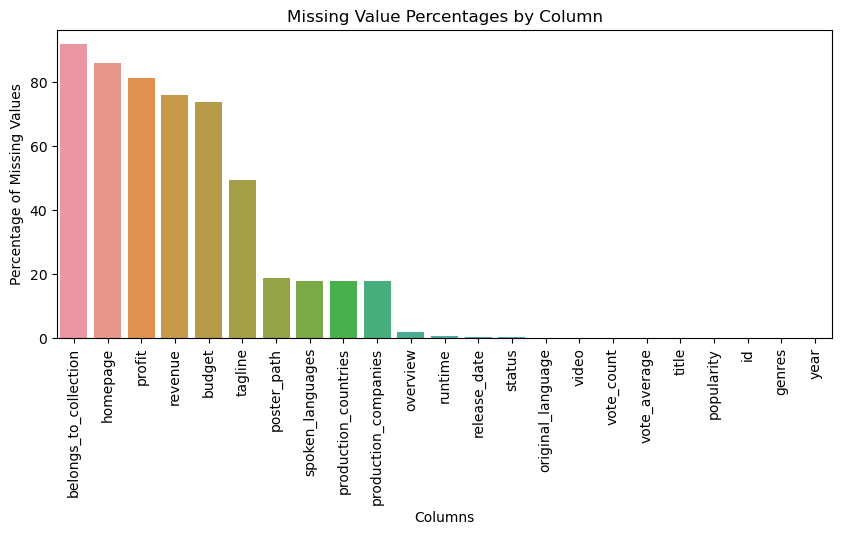

In [805]:
plt.figure(figsize=(10,4))
sns.barplot(x = nulos.index, y = nulos.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Percentages by Column')
plt.show()

### Exploratory Data Analysis (EDA)

#### Worldclouds: 
Estudiar la importancia de la presencia de ciertas palabras en los titulos y descripcion de la pelicula.

In [806]:
movies['title'] = movies['title'].astype('str')
words_title = ' '.join(movies['title'])

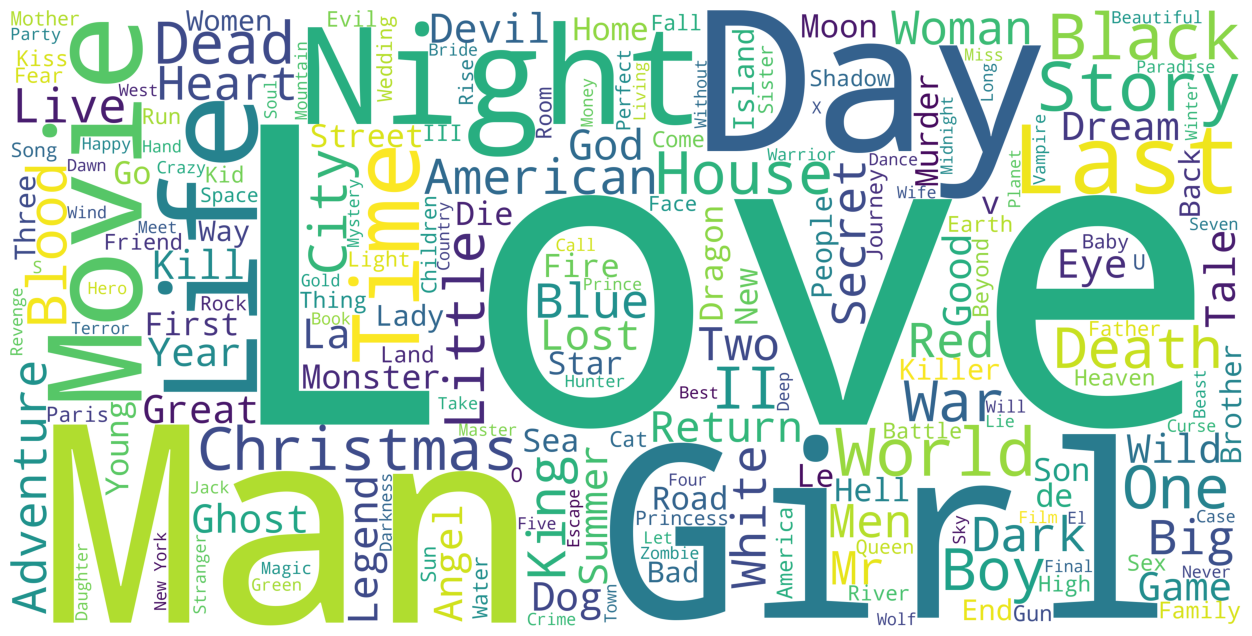

In [807]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_title)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

La palabra **Love** es la mas comun dentro de la eleccion de palabras para titulos. **Man**, **Day** y **Girl** tambien son palabras comunmente utilizadas. Esto encapsula bastante bien la idea de la presencia del romance en las películas.

In [808]:
movies['overview'] = movies['overview'].astype('str')
words_overview = ' '.join(movies['overview'])

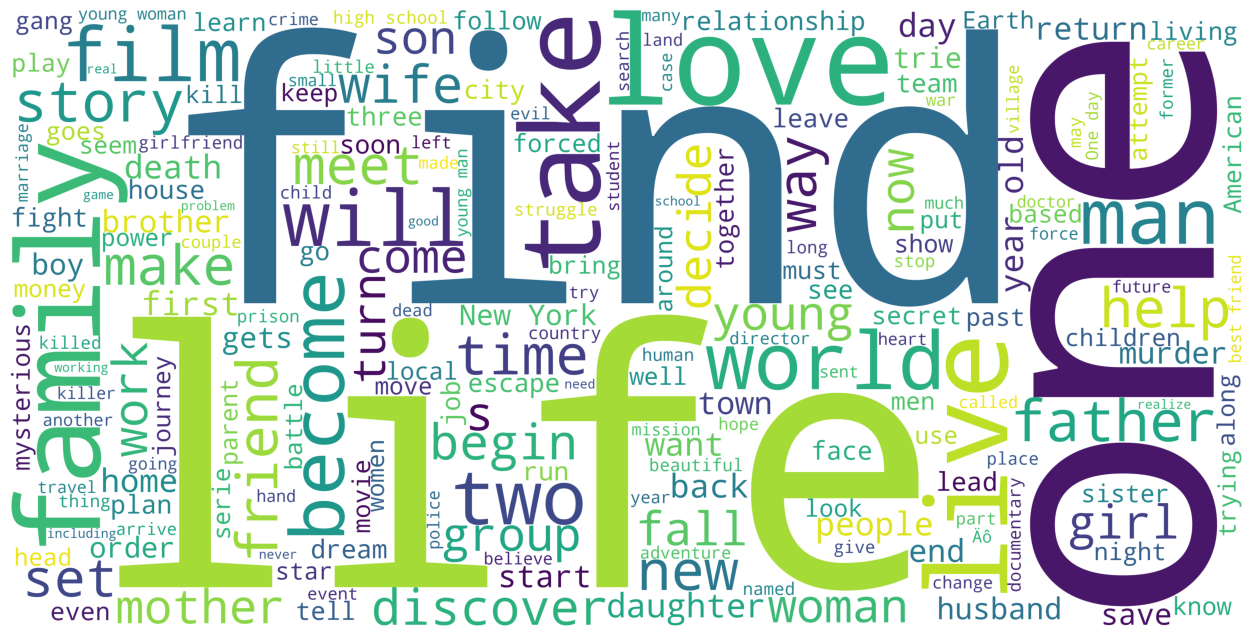

In [809]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_overview)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Find**, **Life** y **One** son las palabras mas frecuentes dentro de las descripciones de las peliculas. **Love**, **Man** y **Girl** no solo estan presentes en los titulos, sino que se repiten en la descripcion.

#### Lenguaje y Paises:
Estudiar la presedencia de las peliculas.

In [810]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [811]:
country = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
country.name = 'countries'

In [812]:
countries = movies.drop('production_countries', axis=1).join(country)
countries = pd.DataFrame(countries['countries'].value_counts())
countries['country'] = countries.index
countries.columns = ['count', 'country']
countries = countries.reset_index().drop('index', axis=1)
countries.head(10)

,count,country
0,21150,United States of America
1,4091,United Kingdom
2,3936,France
3,2250,Germany
4,2168,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,827,India


La mayoria de las peliculas fueron producidas en **Estados Unidos** dado que la mayoria de las peliculas que comprenden el dataset son en ingles.

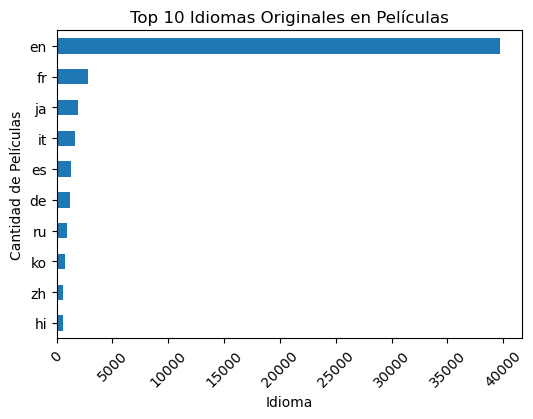

In [813]:
top_languages = movies['original_language'].value_counts().head(10)

# Invertir el orden para que el gráfico sea descendente
top_languages = top_languages.sort_values()

# Creando el gráfico de barras
plt.figure(figsize=(6, 4))
top_languages.plot(kind='barh')
plt.title('Top 10 Idiomas Originales en Películas')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()

In [814]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_42585/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [815]:
merged = world.set_index('name').join(countries.set_index('country'))

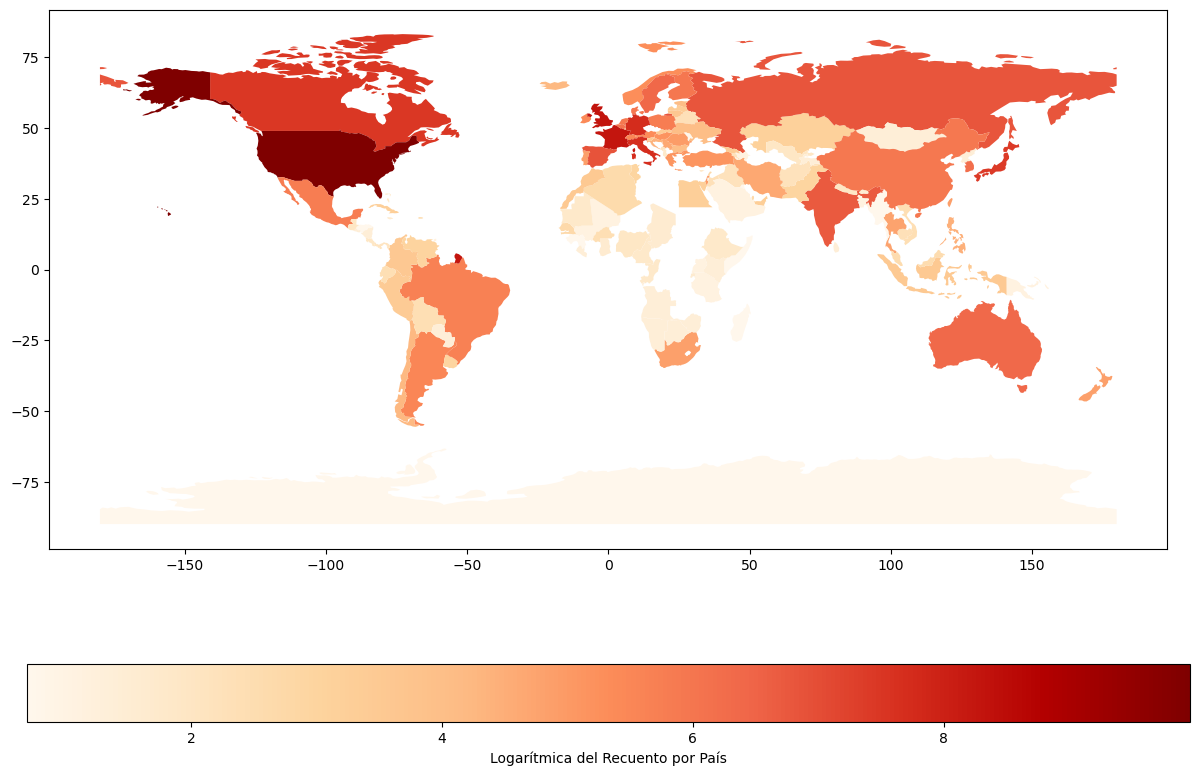

In [816]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Reemplazar valores de 'count' igual a 0 con un número muy pequeño para evitar problemas con el logaritmo
merged['count_log'] = np.log(merged['count'] + 1)

merged.plot(column='count_log', ax=ax, cmap='OrRd', legend=True,
            norm=plt.Normalize(vmin=merged['count_log'].min(), vmax=merged['count_log'].max()),
            legend_kwds={'label': "Logarítmica del Recuento por País",
                         'orientation': "horizontal"})
plt.show()

Se toma el logaritmo de la cantidad en el grafico para poder representar la informacion mejor dado el desbalance presentado por la presencia mayoritaria de peliculas estadounidenses. Ademas de **Estados Unidos**, **Europa** es un gran productor de peliculas.

#### Sagas:

In [817]:
saga =  movies[movies['belongs_to_collection'].notnull()]
saga['belongs_to_collection'] = saga['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
saga = saga[saga['belongs_to_collection'].notnull()]

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_42585/1664572855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saga['belongs_to_collection'] = saga['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)


In [818]:
saga = saga.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [819]:
# Suponiendo que tu DataFrame se llama df
# Ajusta el formato de los números flotantes para que no usen notación científica
pd.set_option('display.float_format', '{:.0f}'.format)

In [820]:
saga.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,963420928,7707367425
1160,Star Wars Collection,8,929311849,7434494790
646,James Bond Collection,26,273345009,7106970239
1317,The Fast and the Furious Collection,8,640637349,5125098793
968,Pirates of the Caribbean Collection,5,904315365,4521576826
1550,Transformers Collection,5,873220249,4366101244
325,Despicable Me Collection,4,922767554,3691070216
1491,The Twilight Collection,5,668421458,3342107290
610,Ice Age Collection,5,643341711,3216708553
666,Jurassic Park Collection,4,757871036,3031484143


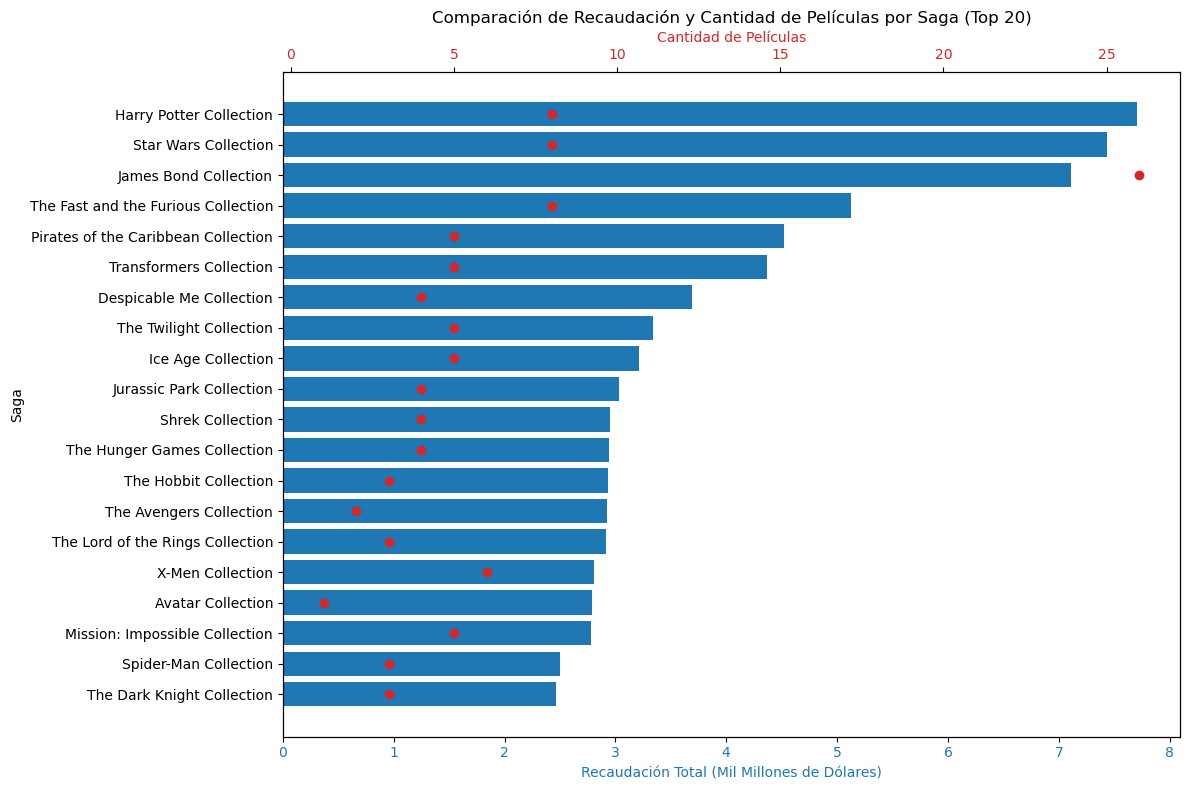

In [838]:
# Tomar las 20 franquicias principales
top_sagas = saga.sort_values(by='sum', ascending=False).head(20)
top_sagas = top_sagas.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Saga')
ax1.barh(top_sagas['belongs_to_collection'], top_sagas['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_sagas['count'], top_sagas['belongs_to_collection'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Saga (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

La saga de **Harry Potter** es la más exitosa en la industria cinematográfica, recaudando más de 7.707 mil millones de dólares con 8 películas. Las películas de **Star Wars** ocupan un cercano segundo lugar, con 7.403 mil millones de dólares también de 8 películas. **James Bond** está en tercer lugar, pero la saga tiene significativamente más películas en comparación con las demás en la lista y, por lo tanto, un promedio de recaudación mucho menor.

Segun la ganancia media de las sagas:

In [822]:
saga.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2787965087,2787965087
1245,The Avengers Collection,2,1462480802,2924961604
479,Frozen Collection,1,1274219009,1274219009
446,Finding Nemo Collection,2,984453212,1968906425
1352,The Hobbit Collection,3,978507785,2935523356
1388,The Lord of the Rings Collection,3,972181581,2916544743
552,Harry Potter Collection,8,963420928,7707367425
1160,Star Wars Collection,8,929311849,7434494790
325,Despicable Me Collection,4,922767554,3691070216
968,Pirates of the Caribbean Collection,5,904315365,4521576826


La **Saga Avatar**, aunque actualmente solo consta de una película, es la franquicia más exitosa de todos los tiempos, con esa única película recaudando cerca de 3 mil millones de dólares. La **Saga de Harry Potter** sigue siendo la más exitosa con al menos 5 películas.

#### Companias Productoras:

In [823]:
movies.loc[movies['production_companies'].isna(), 'production_companies'] = movies.loc[movies['production_companies'].isna(), 'production_companies'].apply(lambda x: [])

# Asegúrate de que todas las entradas sean listas, convierte las cadenas a listas si es necesario
movies['production_companies'] = movies['production_companies'].apply(
    lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x
)

# Extrae los nombres de las compañías productoras si la entrada es una lista no vacía
# movies['production_companies'] = movies['production_companies'].apply(
#     lambda x: [i['name'] for i in x] if isinstance(x, list) and x else []
# )

movies['production_companies'] = movies['production_companies'].apply(
    lambda x: ', '.join([d['name'] for d in x]) if isinstance(x, list) and x else None
)

In [833]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

In [834]:
# Almaceno los registros si las compañias productoras es una lista no vacía
companies = movies[movies['production_companies'].notna()]

In [835]:
companies = companies.pivot_table(index='production_companies', values='revenue', aggfunc={'revenue': ['sum', 'mean', 'count']}).reset_index()

In [836]:
companies.sort_values('sum', ascending=False).head(10)

,production_companies,count,mean,sum
7128,Paramount Pictures,391,119755650,46824459112
9806,Universal Pictures,401,114341451,45850921910
10075,Walt Disney Pictures,146,272474061,39781212886
2174,Columbia Pictures,235,135777854,31907795634
9669,Twentieth Century Fox Film Corporation,291,107157271,31182765770
6628,New Line Cinema,187,85904043,16064056110
9963,Village Roadshow Pictures,74,170437780,12612395710
10094,Warner Bros.,162,75765791,12274058211
2776,DreamWorks SKG,62,179908795,11154345261
5684,Lucasfilm,22,449928232,9898421106


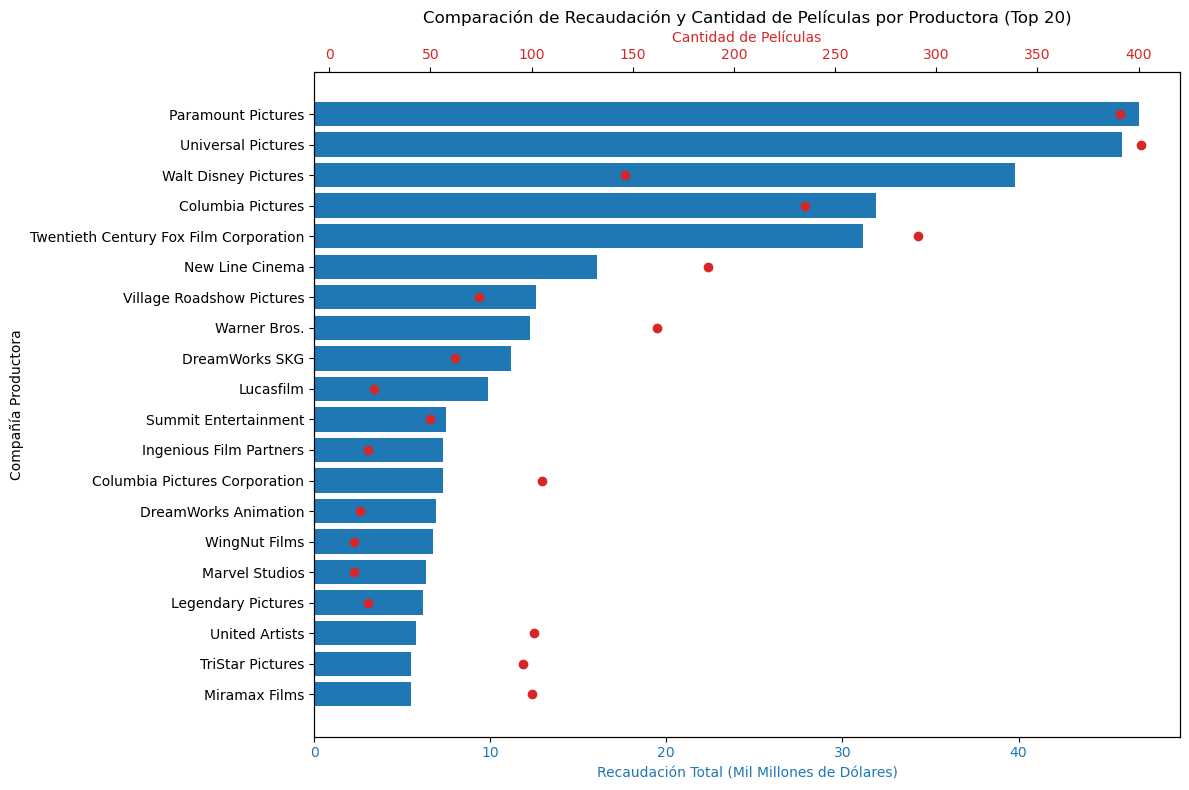

In [839]:
# Tomar las 20 franquicias principales
top_companies = companies.sort_values(by='sum', ascending=False).head(20)
top_companies = top_companies.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Compañía Productora')
ax1.barh(top_companies['production_companies'], top_companies['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_companies['count'], top_companies['production_companies'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Productora (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

**Paramount Pictures** y **Universal Pictures** se destacan como las productoras con el mayor número de películas, aunque no necesariamente es la que lidera en términos de recaudación por pelicula, lo que sugiere una estrategia de producción más enfocada en cantidad. Por otro lado, algunas productoras como **Walt Disney Pictures** y **Pixar Animation Studios**, presentan una menor cantidad de producciones pero con una recaudación total muy alta, indicando que sus películas tienden a ser éxitos que generan ingresos significativos.

#### Popularidad, Voto Promedio y Cantidad de Votos:
En esta sección, trabajaremos con las métricas proporcionadas por los usuarios de TMDB. Intentaremos obtener una comprensión más profunda de las características de popularidad, promedio de votos y conteo de votos e intentaremos deducir cualquier relación entre ellas, así como con otras características numéricas como el presupuesto y los ingresos.